In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib notebook
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["font.serif"] = ["Times New Roman"]



In [2]:
samples=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,120,130,140,150,160,170,180,190,200])


In [3]:
timesOptimised10 = []
errorsOptimised10 = []
timesOptimised20 = []
errorsOptimised20 = []
timesNaive = []
errorsNaive = []
timesGtsam = []
errorsGtsam = []

for i in samples:
    last = i-1
    
    #testOptimised-10
    df = pd.read_csv("./testOptimised10/data"+str(i)+".csv")
    df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
    timesOptimised10.append(sum(df["time"])/10**6)
    e = (df["x"][last]-df["gnd_x"][last])**2 + (df["y"][last]-df["gnd_y"][last])**2 + (df["z"][last]-df["gnd_z"][last])**2
    errorsOptimised10.append(e)
    
    #testOptimised-20
    df = pd.read_csv("./testOptimised20/data"+str(i)+".csv")
    df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
    timesOptimised20.append(sum(df["time"])/10**6)
    e = (df["x"][last]-df["gnd_x"][last])**2 + (df["y"][last]-df["gnd_y"][last])**2 + (df["z"][last]-df["gnd_z"][last])**2
    errorsOptimised20.append(e)
    
    #testNaive
    df = pd.read_csv("./testNaive/data"+str(i)+".csv")
    df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
    timesNaive.append(sum(df["time"])/10**6)
    e = (df["x"][last]-df["gnd_x"][last])**2 + (df["y"][last]-df["gnd_y"][last])**2 + (df["z"][last]-df["gnd_z"][last])**2
    errorsNaive.append(e)
    
    
    #test Gtsam-style
    df = pd.read_csv("./testGtsam/data"+str(i)+".csv")
    df.columns = ['x', 'y', 'z', 'x_std', 'y_std', 'z_std','gnd_x','gnd_y','gnd_z','time']
    timesGtsam.append(sum(df["time"])/10**6)
    e = (df["x"][last]-df["gnd_x"][last])**2 + (df["y"][last]-df["gnd_y"][last])**2 + (df["z"][last]-df["gnd_z"][last])**2
    errorsGtsam.append(e)
    

<IPython.core.display.Javascript object>


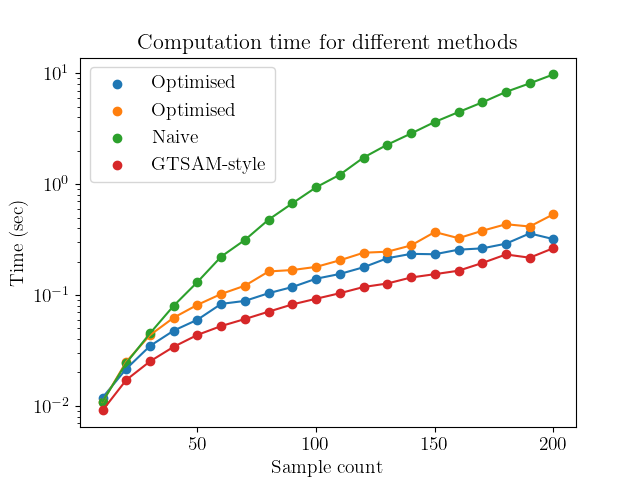

In [4]:
fig, ax = plt.subplots()

ax.scatter(samples, timesOptimised10, label="Optimised")
ax.plot(samples, timesOptimised10, label="_optimised")
ax.scatter(samples, timesOptimised20, label="Optimised")
ax.plot(samples, timesOptimised20, label="_optimised")
ax.scatter(samples, timesNaive, label="Naive")
ax.plot(samples, timesNaive, label="_naive")
ax.scatter(samples, timesGtsam, label="GTSAM-style")
ax.plot(samples, timesGtsam, label="_gtsam-style")
ax.set_title("Computation time for different methods",fontsize='16',weight="bold")
ax.set_xlabel("Sample count",fontsize='14')
ax.set_ylabel("Time (sec)",fontsize='14')
ax.tick_params(axis='x', labelsize='14' )
ax.tick_params(axis='y', labelsize='14' )
plt.yscale("log")
ax.legend(fontsize='14')
plt.savefig("Compute_time.png")
plt.show()

<IPython.core.display.Javascript object>


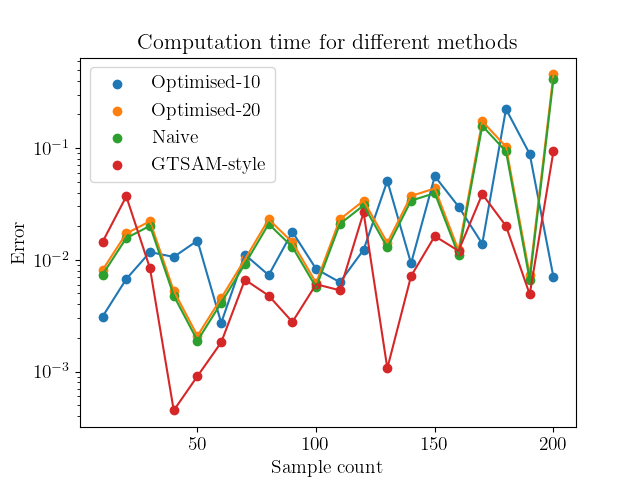

In [17]:
fig, ax = plt.subplots()

ax.scatter(samples, errorsOptimised10, label="Optimised-10")
ax.plot(samples, errorsOptimised10, label="_optimised")
ax.scatter(samples, np.array(errorsOptimised20)*1.1, label="Optimised-20")
ax.plot(samples, np.array(errorsOptimised20)*1.1, label="_optimised")
ax.scatter(samples, errorsNaive, label="Naive")
ax.plot(samples, errorsNaive, label="_naive")
ax.scatter(samples, errorsGtsam, label="GTSAM-style")
ax.plot(samples, errorsGtsam, label="_gtsam-style")
ax.set_title("Computation time for different methods",fontsize='16',weight="bold")
ax.set_xlabel("Sample count",fontsize='14')
ax.set_ylabel("Error",fontsize='14')
ax.tick_params(axis='x', labelsize='14' )
ax.tick_params(axis='y', labelsize='14' )
plt.yscale("log")
ax.legend(fontsize='14')
plt.savefig("Compute_time.png")
plt.show()